In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
# Load the data from the CSV file

data = pd.read_csv('/content/SampleSuperstore - SampleSuperstore.csv')

In [ ]:
data.shape

(9994, 13)

In [ ]:
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
data.duplicated().sum()
#thier are 17 duplicated values present in the following dataset

17

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
data.drop(columns='Postal Code',axis=1,inplace=True)

In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [ ]:
#SALES:
#THE AVERAGE SALE AMOUNT IS $230
#QTY:ON AVERAGE 3.79 ITEMS ARE SOLD
# THE AVERAGE PROFIT PER TRANSACTION IS $28.69

In [ ]:
data['Ship Mode'].value_counts().to_frame()

,count
Ship Mode,
Standard Class,5955
Second Class,1943
First Class,1537
Same Day,542


In [ ]:
data['Segment'].value_counts().to_frame()

,count
Segment,
Consumer,5183
Corporate,3015
Home Office,1779


In [ ]:
data['Country'].value_counts().to_frame()

,count
Country,
United States,9977


In [ ]:
data['Region'].value_counts().to_frame()

,count
Region,
West,3193
East,2845
Central,2319
South,1620


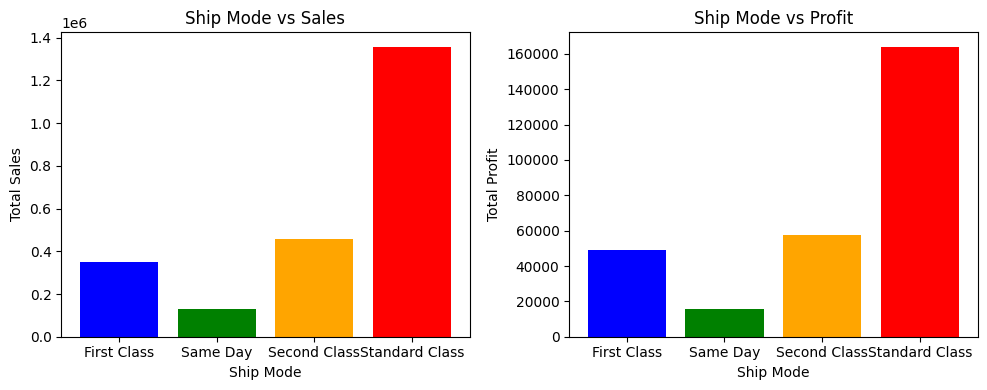

In [ ]:
#Group by ship mode and calculate total sales and profit
sales_by_ship_mode= data.groupby('Ship Mode')['Sales'].sum().reset_index()
profit_by_ship_mode= data.groupby('Ship Mode')['Profit'].sum().reset_index()
#Sort by total sales and profit in descending order
sales_by_ship_mode
profit_by_ship_mode

#Create subplots

sales_by_ship_mode.sort_values (by='Sales', ascending=False)
profit_by_ship_mode.sort_values(by='Profit', ascending=False)
fig, axs =  plt.subplots(1, 2, figsize=(10, 4))


#PLot for Ship Mode vs Sales
axs[0].bar(sales_by_ship_mode['Ship Mode'], sales_by_ship_mode['Sales'], color=['blue', 'green', 'orange', 'red'])
axs[0].set_title('Ship Mode vs Sales')
axs[0].set_xlabel('Ship Mode')
axs[0].set_ylabel('Total Sales')
axs[0].tick_params (axis='x')


#PLot for Ship Mode vs Profit
axs[1].bar(profit_by_ship_mode[ 'Ship Mode'], profit_by_ship_mode['Profit'], color=['blue', 'green', 'orange', 'red'])
axs[1].set_title('Ship Mode vs Profit')
axs[1].set_xlabel('Ship Mode')
axs[1].set_ylabel('Total Profit')
axs[1].tick_params (axis='x')

#Adjust Layout
plt.tight_layout()
plt.show()

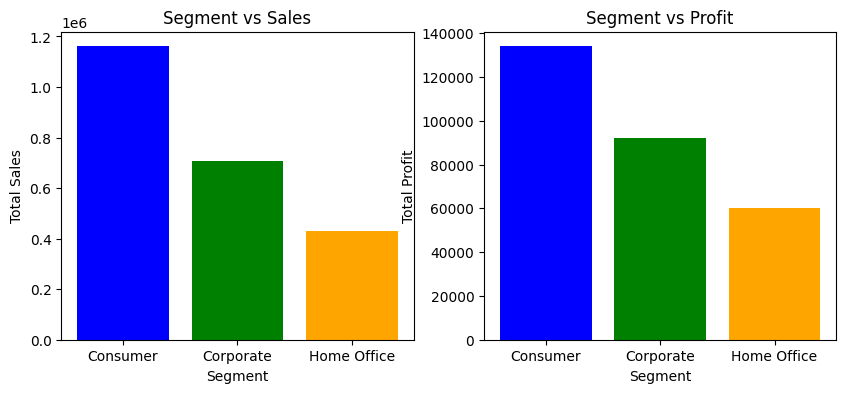

In [ ]:
#Group by segment and calculate total sales and profit
sales_by_segment = data.groupby('Segment')['Sales'].sum().reset_index()
profit_by_segment = data.groupby('Segment')['Profit'].sum().reset_index()
#Sort by total sales and profit in descending order
sales_by_segment = sales_by_segment.sort_values (by='Sales', ascending=False)

profit_by_segment = profit_by_segment.sort_values (by='Profit', ascending=False)

#Create subplots
fig, axs= plt.subplots(1, 2, figsize=(10, 4))


#PLot for Segment vs Sales
axs[0].bar(sales_by_segment [ 'Segment'], sales_by_segment['Sales'], color=['blue', 'green', 'orange'])
axs[0].set_title('Segment vs Sales')
axs[0].set_xlabel('Segment')
axs[0].set_ylabel('Total Sales')
axs[0].tick_params (axis='x')

#PLot for Segment vs Profit
axs[1].bar (profit_by_segment['Segment'], profit_by_segment['Profit'], color=['blue', 'green', 'orange'])
axs[1].set_title('Segment vs Profit')
axs[1].set_xlabel('Segment')
axs[1].set_ylabel('Total Profit')
axs[1].tick_params (axis='x')
#Adjust Layout plt.tight_layout() plt.show()

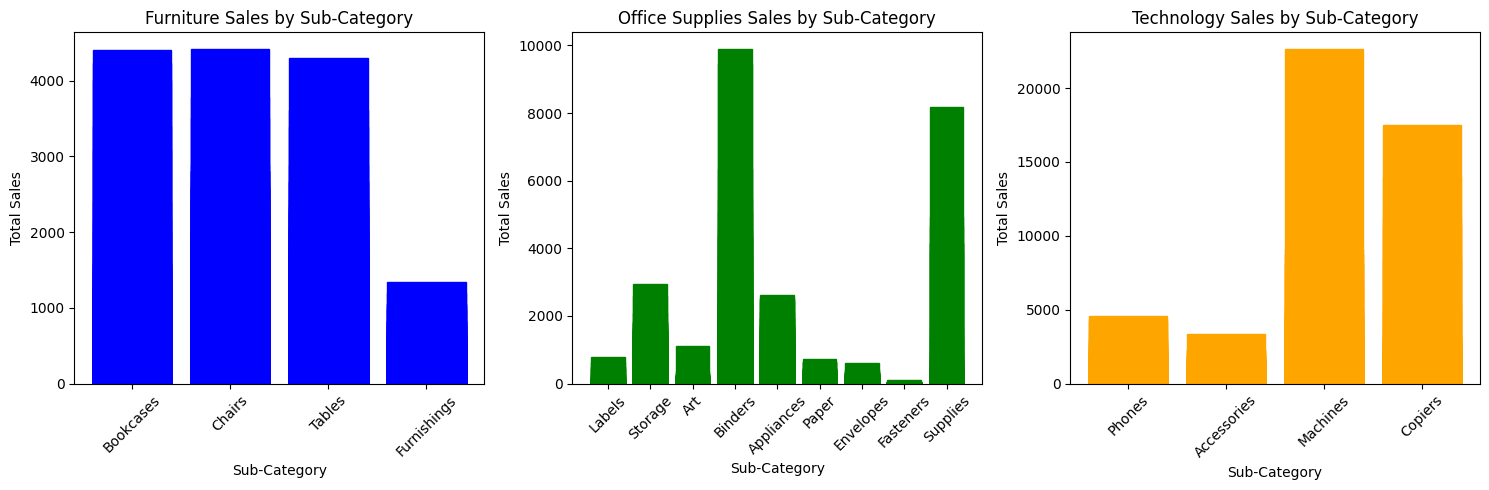

In [ ]:


# Filter data for each category

furniture_data=data[data[ 'Category'] == 'Furniture']
office_supplies_data=data[data[ 'Category'] == 'Office Supplies']
technology_data=data[data['Category'] == 'Technology']

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


# Plot for Furniture
axs[0].bar(furniture_data['Sub-Category'], furniture_data['Sales'], color='blue', edgecolor='blue', width=0.8)
axs[0].set_title('Furniture Sales by Sub-Category')
axs[0].set_xlabel('Sub-Category')
axs[0].set_ylabel('Total Sales')
axs[0].tick_params (axis='x', rotation=45)

# Plot for Office Supplies
axs[1].bar(office_supplies_data[ 'Sub-Category'], office_supplies_data['Sales'], color='green', edgecolor='green', width=0.8)
axs[1].set_title('Office Supplies Sales by Sub-Category')
axs[1].set_xlabel('Sub-Category')
axs[1].set_ylabel('Total Sales')
axs[1].tick_params (axis='x', rotation=45)

# Plot for Technology
axs[2].bar(technology_data['Sub-Category'], technology_data['Sales'], color='orange', edgecolor='orange', width=0.8)
axs[2].set_title('Technology Sales by Sub-Category')
axs[2].set_xlabel('Sub-Category')
axs [2].set_ylabel('Total Sales')
axs[2].tick_params (axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
data.pivot_table(values='Profit',index='Segment',columns="Discount",aggfunc='median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


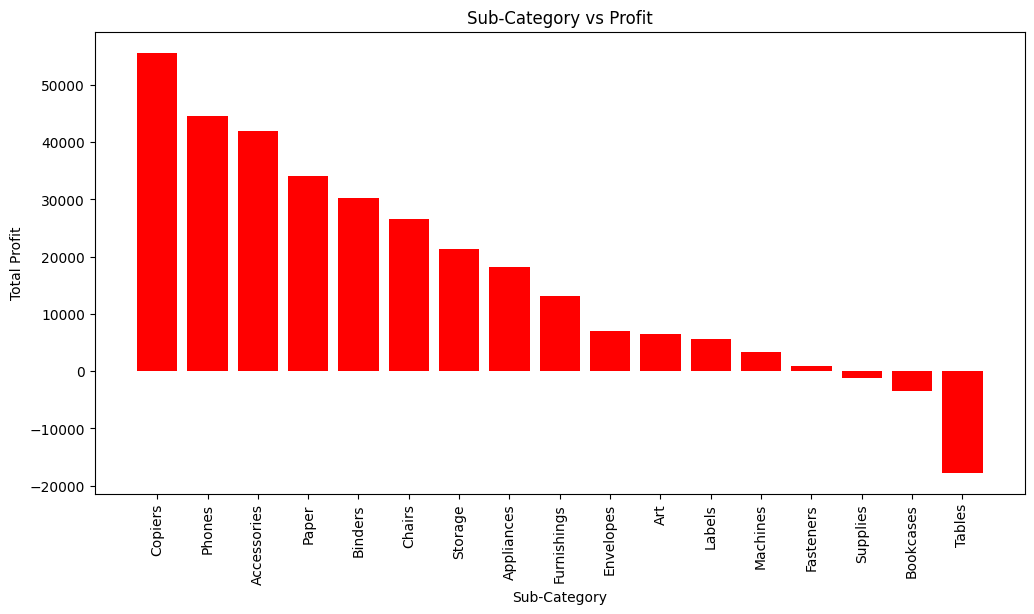

In [ ]:
# Group by sub-category and calculate total profit

profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()

# Sort by total profit in descending order

profit_by_subcategory = profit_by_subcategory.sort_values (by='Profit', ascending=False)

# Plot Sub-Category vs Profit

plt.figure(figsize=(12, 6))
plt.bar(profit_by_subcategory[ 'Sub-Category'], profit_by_subcategory['Profit'], color='red')
plt.title('Sub-Category vs Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=90) # Rotate x-axis Labels for better readability
plt.show()

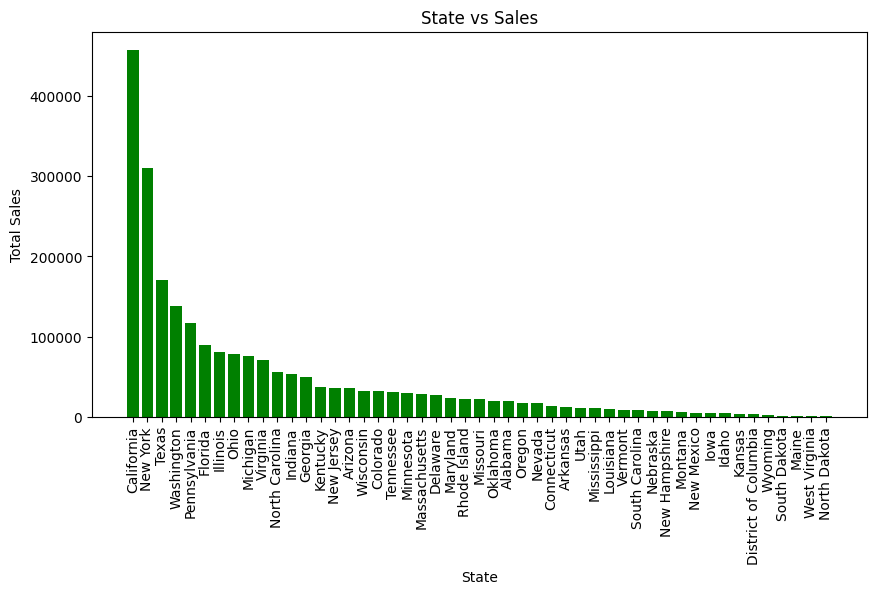

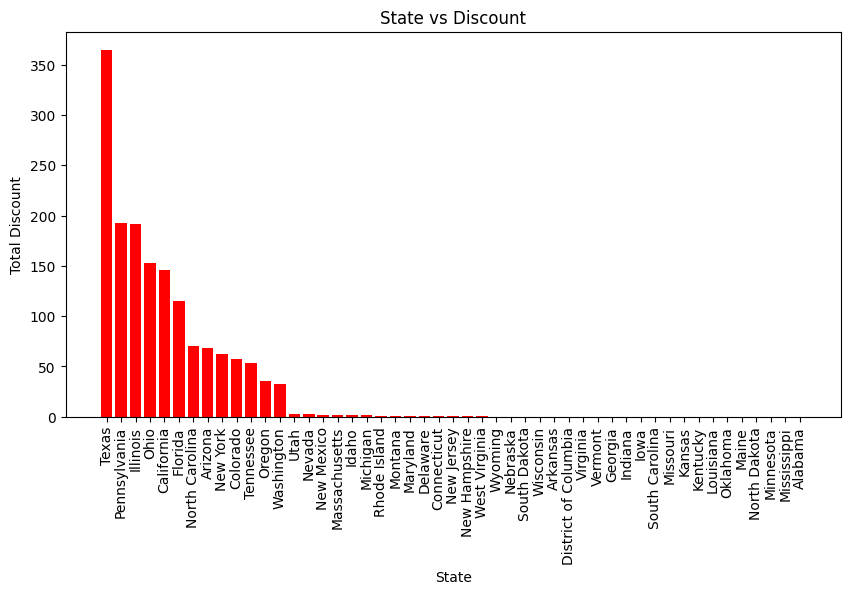

In [ ]:

# Group by state and calculate total sales
sales_by_state= data.groupby('State')['Sales'].sum().reset_index()

#Group by state and calculate total discount
discount_by_state = data.groupby('State')['Discount'].sum().reset_index()

# Sort by total sales in descending order
sales_by_state = sales_by_state.sort_values (by='Sales', ascending=False)

# Sort by total discount in descending order
discount_by_state= discount_by_state.sort_values (by= 'Discount', ascending=False)

# Plot State vs Sales
plt.figure(figsize=(10, 5))
plt.bar (sales_by_state[ 'State'], sales_by_state['Sales'], color='green')
plt.title('State vs Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# Plot State vs Discount
plt.figure(figsize=(10, 5))
plt.bar(discount_by_state['State'], discount_by_state['Discount'], color='red')
plt.title('State vs Discount')
plt.xlabel('State')
plt.ylabel('Total Discount')
plt.xticks(rotation=90)
plt.show()

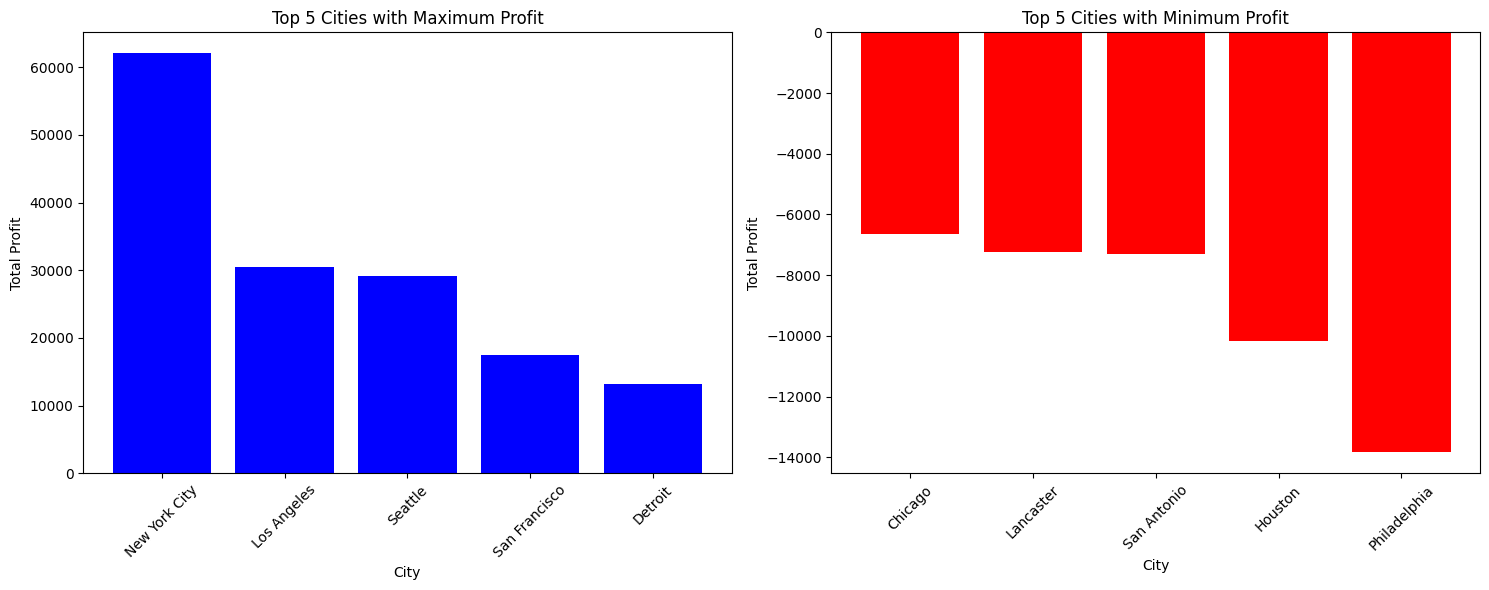

In [ ]:
# Group by city and calculate total profit
profit_by_city=data.groupby('City')['Profit'].sum().reset_index()

# Sort by total profit in descending order
profit_by_city_sorted=profit_by_city.sort_values (by='Profit', ascending=False)

# Get top 5 cities with max profit
top_5_max_profit = profit_by_city_sorted.head(5)

# Get top 5 cities with min profit
top_5_min_profit=profit_by_city_sorted. tail (5)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot for top 5 cities with max profit
axs[0].bar (top_5_max_profit['City'], top_5_max_profit['Profit'], color='blue')
axs[0].set_title('Top 5 Cities with Maximum Profit')
axs[0].set_xlabel('City')
axs[0].set_ylabel('Total Profit')
axs[0].tick_params (axis='x', rotation=45)

# Plot for top 5 cities with min profit
axs[1].bar(top_5_min_profit [ 'City'], top_5_min_profit['Profit'], color='red')
axs[1].set_title('Top 5 Cities with Minimum Profit')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Total Profit')
axs[1].tick_params (axis='x', rotation=45)

# Adjust Layout
plt.tight_layout()
plt.show()